In [13]:
import numpy as np
from collections import Counter
import collections
import math
import os
import random
from multiprocessing import Queue, Process
from Bio import SeqIO
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

In [17]:
help(Counter)

Help on class Counter in module collections:

class Counter(builtins.dict)
 |  Dict subclass for counting hashable items.  Sometimes called a bag
 |  or multiset.  Elements are stored as dictionary keys and their counts
 |  are stored as dictionary values.
 |  
 |  >>> c = Counter('abcdeabcdabcaba')  # count elements from a string
 |  
 |  >>> c.most_common(3)                # three most common elements
 |  [('a', 5), ('b', 4), ('c', 3)]
 |  >>> sorted(c)                       # list all unique elements
 |  ['a', 'b', 'c', 'd', 'e']
 |  >>> ''.join(sorted(c.elements()))   # list elements with repetitions
 |  'aaaaabbbbcccdde'
 |  >>> sum(c.values())                 # total of all counts
 |  15
 |  
 |  >>> c['a']                          # count of letter 'a'
 |  5
 |  >>> for elem in 'shazam':           # update counts from an iterable
 |  ...     c[elem] += 1                # by adding 1 to each element's count
 |  >>> c['a']                          # now there are seven 'a'
 |  7
 

In [2]:
dir_ = '/mnt/Archive/Data_Sets/OGT/ogt_classes'
file_thermo = 'ogt_70_81.fasta'
file_meso = 'ogt_4_15.fasta'

max_length = 512

dat_thermo = {'id':[], 'ogt':[], 'seq':[]}
dat_meso = {'id':[], 'ogt':[], 'seq':[]}

for rec in SeqIO.parse(os.path.join(dir_,file_thermo), 'fasta'):
    if len(str(rec.seq)) > max_length:
        continue
    dat_thermo['id'].append(rec.id)
    dat_thermo['ogt'].append(float(rec.description.split()[-1]))
    dat_thermo['seq'].append(rec.seq)
for rec in SeqIO.parse(os.path.join(dir_,file_meso), 'fasta'):
    if len(str(rec.seq)) > max_length:
        continue
    dat_meso['id'].append(rec.id)
    dat_meso['ogt'].append(float(rec.description.split()[-1]))
    dat_meso['seq'].append(rec.seq)

cnt_thermo = Counter()
cnt_meso = Counter()
word_lengt = 2
list_of_ngrams = []
length_sequences_thermo = 0
length_sequences_meso = 0
for k in range(len(dat_thermo['seq'])):
    for ofset in range(word_lengt):
        list_of_ngrams += [ str(dat_thermo['seq'][k][i+ofset:i+word_lengt+ofset]) for i in range(0,len(dat_thermo['seq'][k])-word_lengt-ofset,word_lengt)]
    length_sequences_thermo += len(str(dat_thermo['seq'][k]))
for word in list_of_ngrams:
    cnt_thermo[word] += 1/length_sequences_thermo
list_of_ngrams = []

for k in range(len(dat_meso['seq'])):
    for ofset in range(word_lengt):        
        list_of_ngrams += [ str(dat_meso['seq'][k][i+ofset:i+word_lengt+ofset]) for i in range(0,len(dat_meso['seq'][k])-word_lengt-ofset,word_lengt)]   
    length_sequences_meso += len(str(dat_meso['seq'][k]))
for word in list_of_ngrams:
    cnt_meso[word] += 1/length_sequences_meso

(array([  13999.,  158014., 1868845.,  836190.,   41977.,   46785.,
          27186.,   10886.,    9295.,    2328.]),
 array([  4. ,  13.9,  23.8,  33.7,  43.6,  53.5,  63.4,  73.3,  83.2,
         93.1, 103. ]),
 <a list of 10 Patch objects>)

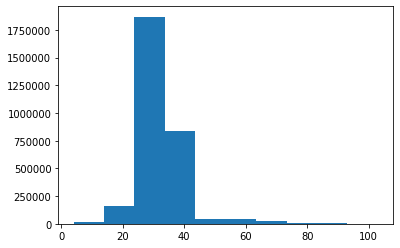

In [3]:
dir_ = '/mnt/Archive/Data_Sets/OGT'
file = 'ogt.fasta'

max_length = 512

dat = {'id':[], 'ogt':[], 'seq':[]}


for rec in SeqIO.parse(os.path.join(dir_,file), 'fasta'):
    dat['id'].append(rec.id)
    dat['ogt'].append(float(rec.description.split()[-1]))
    dat['seq'].append(rec.seq)

plt.hist(dat['ogt'], bins=103)



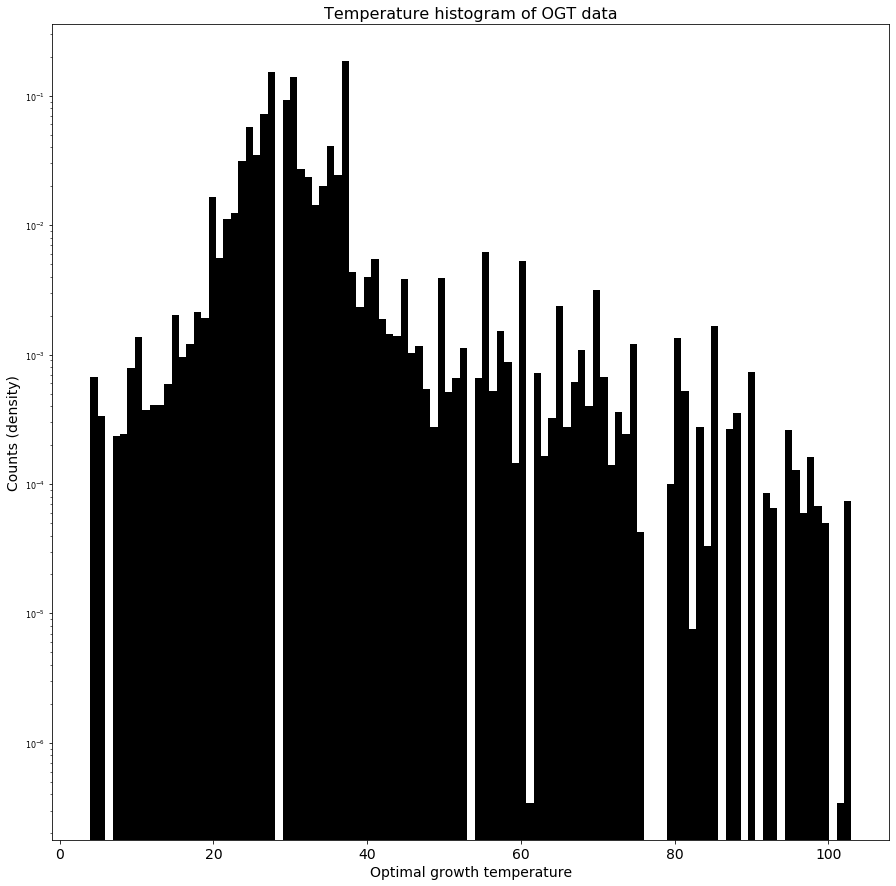

In [38]:


SMALL_SIZE = 8
MEDIUM_SIZE = 14
BIGGER_SIZE = 16




fig = plt.figure(figsize=[15,15])

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

N, bins, patches = plt.hist(dat['ogt'], bins=103, density=True, color='black')
#for i in range(0,11):
#    patches[i].set_facecolor('b')
#for i in range(11,70):    
#    patches[i].set_facecolor('black')
#for i in range(70, 81):
#    patches[i].set_facecolor('r')
#for i in range(81, len(patches)):
#    patches[i].set_facecolor('black')

#plt.ylim((0, 0.01))
plt.yscale('log')
#handles = [Rectangle((0,0),1,1,color=c,ec="k") for c in ['b','black', 'r']]
#labels= ['mesophiles region', 'region not included', 'Thermophile region']
#plt.legend(handles, labels)
    

plt.title('Temperature histogram of OGT data')
plt.xlabel('Optimal growth temperature')
plt.ylabel('Counts (density)')
plt.show()

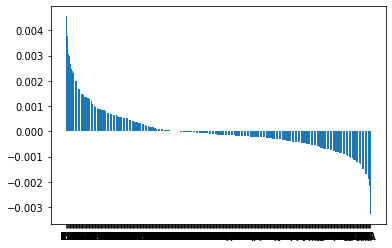

In [30]:
import matplotlib.pyplot as plt

cnt_thermo.subtract(cnt_meso)

x = [i for i in range(0,400)]
hight = [cnt_thermo.most_common(400)[i][1] for i in range(400)]
label = [cnt_thermo.most_common(400)[i][0] for i in range(400)]
plt.bar(x, hight)

plt.xticks(x,label)
plt.show()

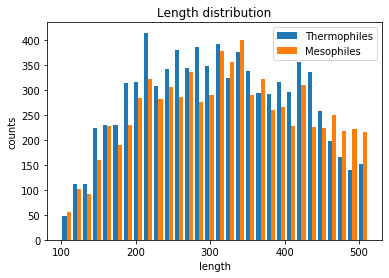

In [2]:
dir_ = '/mnt/Archive/Data_Sets/OGT/ogt_classes'
file_thermo = 'ogt_70_81.fasta'
file_meso = 'ogt_15_26.fasta'

max_length = 512

dat_thermo = {'len':[]}
dat_meso = {'len':[]}

for rec in SeqIO.parse(os.path.join(dir_,file_thermo), 'fasta'):
    if len(str(rec.seq)) > max_length:
        continue
    dat_thermo['len'].append(len(str(rec.seq)))
for rec in SeqIO.parse(os.path.join(dir_,file_meso), 'fasta'):
    if len(str(rec.seq)) > max_length:
        continue
    dat_meso['len'].append(len(str(rec.seq)))
    
plt.hist([dat_thermo['len'],dat_meso['len']], bins=30)
plt.title('Length distribution')
plt.legend(['Thermophiles', 'Mesophiles'])
plt.xlabel('length')
plt.ylabel('counts')
plt.show()


In [3]:
dir_ = '/mnt/Archive/Data_Sets/OGT/ogt_classes'
file_thermo = 'ogt_70_81.fasta'
file_meso = 'ogt_4_15.fasta'
max_length = 512
dat_thermo = {'id':[], 'ogt':[], 'seq':[]}
dat_meso = {'id':[], 'ogt':[], 'seq':[]}
count_thermo = 0
count_meso = 0
for rec in SeqIO.parse(os.path.join(dir_,file_thermo), 'fasta'):
    if len(str(rec.seq)) > max_length:
        continue
    count_thermo += 1
    dat_thermo['id'].append(rec.id)
    dat_thermo['ogt'].append(float(rec.description.split()[-1]))
    dat_thermo['seq'].append(rec.seq)
    
for rec in SeqIO.parse(os.path.join(dir_,file_meso), 'fasta'):
    if len(str(rec.seq)) > max_length:
        continue
    count_meso += 1
    dat_meso['id'].append(rec.id)
    dat_meso['ogt'].append(float(rec.description.split()[-1]))
    dat_meso['seq'].append(rec.seq)


word_length =1
list_of_ngrams = []
for k in range(len(dat_thermo['seq'])):
    for ofset in range(word_length):
        list_of_ngrams += [ str(dat_thermo['seq'][k][i+ofset:i+word_length+ofset]) for i in range(0,len(dat_thermo['seq'][k])-word_length-ofset,word_length)]

for k in range(len(dat_meso['seq'])):
    for ofset in range(word_length):        
        list_of_ngrams += [ str(dat_meso['seq'][k][i+ofset:i+word_length+ofset]) for i in range(0,len(dat_meso['seq'][k])-word_length-ofset,word_length)]   

s = set(list_of_ngrams)

dict_index = {key: i for i, key in enumerate(s)}


In [4]:

features_thermo = np.zeros((count_thermo,20**word_length), dtype = np.float32)
features_meso = np.zeros((count_meso,20**word_length), dtype = np.float32)
list_of_ngrams = []
for k in range(len(dat_thermo['seq'])):
    for ofset in range(word_length):
        list_of_ngrams = [ str(dat_thermo['seq'][k][i+ofset:i+word_length+ofset]) for i in range(0,len(dat_thermo['seq'][k])-word_length-ofset,word_length)]
    for key in list_of_ngrams:
        features_thermo[k,dict_index[key]]+=1
    length = len(str(dat_thermo['seq'][k]))
    features_thermo[k,:]/=length
    
    
for k in range(len(dat_meso['seq'])):
    for ofset in range(word_length):        
        list_of_ngrams = [ str(dat_meso['seq'][k][i+ofset:i+word_length+ofset]) for i in range(0,len(dat_meso['seq'][k])-word_length-ofset,word_length)]   
    for key in list_of_ngrams:
        features_meso[k,dict_index[key]]+=1
    length = len(str(dat_meso['seq'][k]))
    features_meso[k,:]/=length    

In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X= np.concatenate((features_thermo, features_meso))
pca.fit(X)
X_pca = pca.transform(X)

In [6]:
k

7805

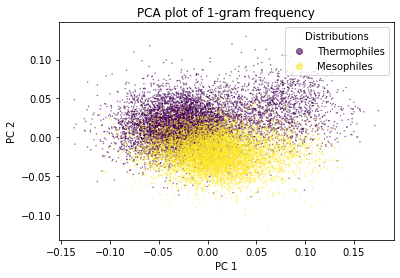

In [7]:
import matplotlib.pyplot as plt
y = np.ones((count_thermo+count_meso,))
y[count_thermo:] = 2

scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, s = 0.1)

plt.title('PCA plot of {}-gram frequency'.format(word_length))
handles, labels = scatter.legend_elements(prop="colors", alpha=0.6)
legend2 = plt.legend(handles, ['Thermophiles', 'Mesophiles'], loc="upper right", title="Distributions")
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

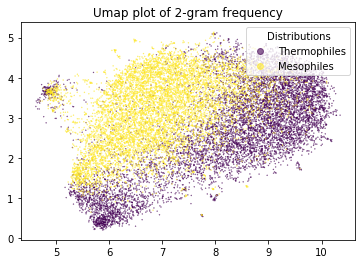

In [8]:
import umap
reducer = umap.UMAP(n_neighbors=100, min_dist = 0.0)
X_umap = reducer.fit_transform(X)
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y, s = 0.1)
plt.title('Umap plot of {}-gram frequency'.format(word_length))
handles, labels = scatter.legend_elements(prop="colors", alpha=0.6)
legend2 = plt.legend(handles, ['Thermophiles', 'Mesophiles'], loc="upper right", title="Distributions")
plt.show()


In [3]:
from quantiprot.utils.io import load_fasta_file
from quantiprot.utils.feature import Feature, FeatureSet
from quantiprot.metrics.aaindex import get_aaindex_file
from quantiprot.metrics.basic import average

file = '/mnt/Archive/Data_Sets/OGT/ogt_70_81.fasta'

# Load data:
seq = load_fasta_file(file)

# Build a feature: average polarity (Grantham, 1974), AAindex entry: GRAR740102:
feat = Feature(get_aaindex_file("GRAR740102")).then(average)

# Add the feature to new feature set:
fs = FeatureSet("my set")
fs.add(feat)

# Process sequences:
res_seq = fs(seq)

# Export average polarities
res = res_seq.columns()
print (res)


[[8.285714285714288, 8.331106870228998, 8.27544642857143, 8.335602094240835, 8.40395833333333, 8.364896755162242, 8.34332925336596, 8.943851508120662, 8.514110429447854, 8.43225, 8.901183431952663, 8.25, 8.234346504559275, 8.48942731277533, 8.668055555555554, 8.476142131979696, 8.345733788395904, 8.476800000000006, 8.599532710280386, 8.537050359712225, 8.502641509433973, 8.20421686746988, 8.232103321033215, 8.39550321199143, 8.315825688073394, 8.649214659685864, 7.379653679653676, 8.469281767955792, 8.59227722772277, 7.438314176245217, 8.475071633237823, 7.364166666666673, 8.35409836065574, 8.292655367231642, 8.281226053639854, 8.344802867383512, 8.237956204379563, 8.285427135678399, 8.330260047281328, 8.354103343465043, 8.065857885615241, 8.399076212471128, 8.506386861313855, 8.489044943820229, 8.482849604221629, 9.05429687500001, 8.13401639344263, 8.353290529695014, 8.471258907363417, 8.628767123287664, 8.43678756476684, 8.495760598503745, 8.47378190255221, 8.411718750000004, 7.46456

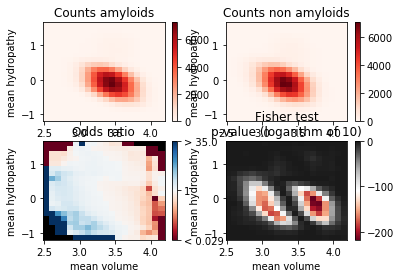

In [5]:
from quantiprot.utils.io import load_fasta_file
from quantiprot.utils.feature import Feature, FeatureSet
from quantiprot.metrics.aaindex import get_aa2volume, get_aa2hydropathy
from quantiprot.metrics.basic import average

file_termo = '/mnt/Archive/Data_Sets/OGT/ogt_70_81.fasta'
file_meso = '/mnt/Archive/Data_Sets/OGT/ogt_4_15.fasta'

# Local Fisher-test related imports:
from quantiprot.analysis.fisher import local_fisher_2d, _plot_local_fisher_2d

from matplotlib import pyplot as plt

# Load sets of amyloidogenic and non-amyloidogenic peptides:
amyload_pos_seq = load_fasta_file(file_termo)
amyload_neg_seq = load_fasta_file(file_meso)

# Calculate quantitive features: volume and hydropathy
mean_volume = Feature(get_aa2volume()).then(average)
mean_hydropathy = Feature(get_aa2hydropathy()).then(average)

fs = FeatureSet("volume'n'hydropathy")
fs.add(mean_volume)
fs.add(mean_hydropathy)

amyload_pos_conv_seq = fs(amyload_pos_seq)
amyload_neg_conv_seq = fs(amyload_neg_seq)

# Do local Fisher:
result = local_fisher_2d(amyload_pos_conv_seq, amyload_neg_conv_seq,
                         windows_per_frame=5, overlap_factor=5)

# Plot local Fisher:
_plot_local_fisher_2d(result, xlabel="mean volume",
                              ylabel="mean hydropathy",
                              pop1_label="amyloids",
                              pop2_label="non amyloids")


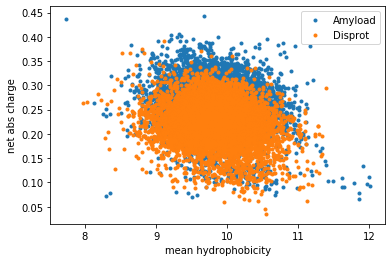

In [15]:
# Uversky plot
from quantiprot.utils.io import load_fasta_file
from quantiprot.utils.feature import Feature, FeatureSet
from quantiprot.utils.sequence import compact
from quantiprot.metrics.aaindex import get_aa2charge, get_aa2hydropathy,get_aa2numeric
from quantiprot.metrics.basic import average, average_absolute

from matplotlib import pyplot as plt

amyload_seq = load_fasta_file(file_termo)
disprot_seq = load_fasta_file(file_meso)

# Non-standard letters in Disprot assigned neutral charge and hydropathy:
net_abs_charge = Feature(get_aa2charge(default=0)).then(average_absolute)
mean_hydropathy = Feature(get_aa2hydropathy(default=0)).then(average)
n_amino = Feature(get_aa2numeric(default=0)).then(average_absolute)

uversky_fs = FeatureSet("uversky")
uversky_fs.add(n_amino, name="mean_hydropathy")
uversky_fs.add(net_abs_charge, name="net_abs_charge")

amyload_uversky_seq = uversky_fs(amyload_seq)
disprot_uversky_seq = uversky_fs(disprot_seq)

# First approach to get hydrophobicity/charge pairs
amyload_data_x = amyload_uversky_seq.columns(feature="mean_hydropathy")[0]
amyload_data_y = amyload_uversky_seq.columns(feature="net_abs_charge")[0]
plt.plot(amyload_data_x, amyload_data_y,'.', label="Thermo")

# Second approach to get hydrophobicity/charge pairs
disprot_data = compact(disprot_uversky_seq).columns()
plt.plot(disprot_data[0], disprot_data[1],'.', label="Meso")

plt.xlabel("mean n amino acid")
plt.ylabel("net abs charge")
plt.legend()
plt.show()


In [8]:
import quantiprot.metrics.aaindex as aaidx


In [9]:
help(aaidx)

Help on module quantiprot.metrics.aaindex in quantiprot.metrics:

NAME
    quantiprot.metrics.aaindex

DESCRIPTION
    This module provides functions to generate the Mapping objects based on
    various physico-chemical properties of aminoacids defined in the AAindex
    database. In addition, generators of several common mappings are included.
    
    Functions:
        _parse_aaindex: generate a Mapping for an AAindex entry.
        get_aaindex_file: given an index, generate a Mapping from the AAindex
            flat file.
        get_aaindex_www: given an index, generate a Mapping from the AAindex
            website.
        get_aa2numeric: generate a Mapping from aminoacids to integers.
        get_aa2charge: generate a Mapping from aminoacids to formal charges.
        get_aa2volume: generate a Mapping from aminoacids to van der Waals volumes.
        get_aa2mj: generate a Mapping from aminoacids to the Miyazawa-Jernigan
            hydrophobicity scale.

FUNCTIONS
    get_aa2c

In [14]:
from quantiprot.utils.io import load_fasta_file
from quantiprot.utils.feature import Feature, FeatureSet
from quantiprot.metrics.aaindex import get_aa2hydropathy
from quantiprot.metrics.basic import identity

# Ngram-related imports
from quantiprot.metrics.ngram import pattern_match, pattern_count
from quantiprot.metrics.alphabet import PROTEIN
from quantiprot.analysis.ngram import ngram_count

from matplotlib import pyplot as plt

# Load some data
thermo = load_fasta_file(file_termo)
meso = load_fasta_file(file_meso)

result_freq = ngram_count(termo, n=2)
print (result_freq)


ModuleNotFoundError: No module named 'powerlaw'

In [ ]:
import pandas as pd

FILE "/mnt/Archive/Data_Sets"

In [1]:
from Bio import SeqIO

file = "../../data/clean/OGT_sequences.fasta"

temp_thermo = 45
temp_meso = 35

count_all = 0
count_meso = 0
count_thermo = 0
temp = []
for i, rec in enumerate(SeqIO.parse(file,"fasta")):
    ogt = float(rec.description.split()[-1])
    temp.append(ogt)
    if ogt >= temp_thermo:
        count_thermo += 1
    elif ogt <= temp_meso:
        count_meso +=1
print("Total number of sequences", i)
print("Number of mesophiles", count_meso)
print("Number of thermophiles", count_thermo)

Total number of sequences 2431999
Number of mesophiles 1779498
Number of thermophiles 111588


In [39]:
import matplotlib.pyplot as plt

SMALL_SIZE = 16
MEDIUM_SIZE = 20
BIGGER_SIZE = 24

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


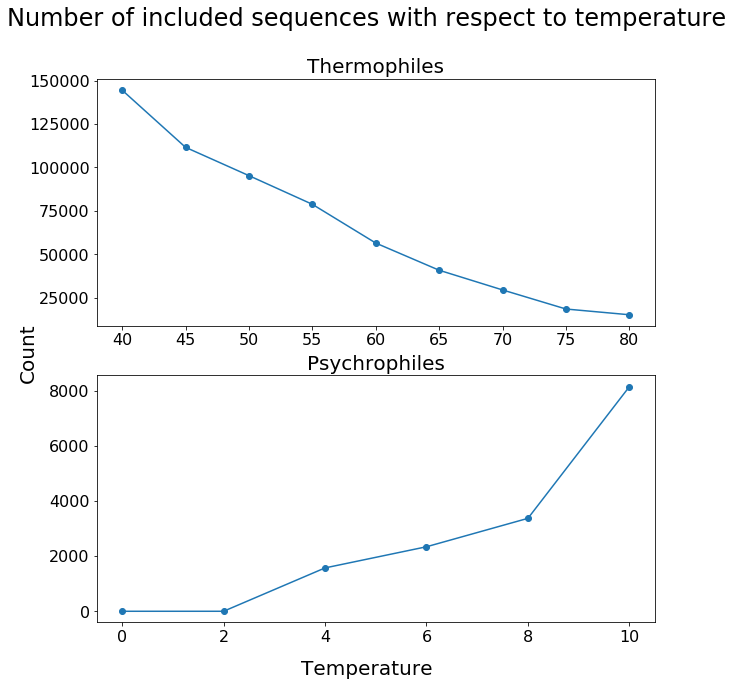

In [42]:
list_temp_thermo = {i: 0 for i in range(40,85,5)}
list_temp_psycro = {i: 0 for i in range(0,12, 2)}
for t in temp:
    for key in list_temp_thermo.keys():
        if key <= t:
            list_temp_thermo[key] += 1
            
    for key in list_temp_psycro.keys():
        if key >= t:
            list_temp_psycro[key] += 1

fig = plt.figure(figsize=[10,10]) 
plt.xlabel("Temperature")
plt.ylabel("Count")
plt.subplot(211)           
x = list(list_temp_thermo.keys())
y = [list_temp_thermo[key] for key in list_temp_thermo.keys()]

plt.plot(x, y, 'o-')
plt.title("Thermophiles")



plt.subplot(212)           
x = list(list_temp_psycro.keys())
y = [list_temp_psycro[key] for key in list_temp_psycro.keys()]

plt.plot(x, y, 'o-')
plt.title("Psychrophiles")


fig.text(0.5, 0.06, 'Temperature', ha='center', va='center', fontsize=20)
fig.text(0.03, 0.5, 'Count', ha='center', va='center', rotation='vertical', fontsize=20)
plt.suptitle('Number of included sequences with respect to temperature')
plt.show()

(array([  10981.,  122763., 1499462.,  683994.,   34423.,   38822.,
          22525.,    9221.,    7821.,    1988.]),
 array([  4. ,  13.9,  23.8,  33.7,  43.6,  53.5,  63.4,  73.3,  83.2,
         93.1, 103. ]),
 <a list of 10 Patch objects>)

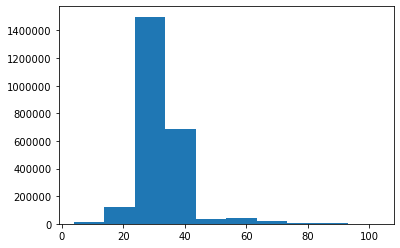

In [21]:
import matplotlib.pyplot as plt

plt.hist(temp)

In [15]:
AAS = 'ACDEFGHIKLMNPQRSTVWYX'
def get_ngrams( n_grams ):
    tmp = []
    for aa in AAS:
        for n in n_grams:
            tmp.append(str(aa+n))
    return tmp


In [25]:
word_length = 3
n_grams = [aa for aa in AAS]
if word_length > 1:
    for _ in range (word_length-1):
        n_grams = get_ngrams(n_grams)
print (n_grams)

['AAA', 'AAC', 'AAD', 'AAE', 'AAF', 'AAG', 'AAH', 'AAI', 'AAK', 'AAL', 'AAM', 'AAN', 'AAP', 'AAQ', 'AAR', 'AAS', 'AAT', 'AAV', 'AAW', 'AAY', 'AAX', 'ACA', 'ACC', 'ACD', 'ACE', 'ACF', 'ACG', 'ACH', 'ACI', 'ACK', 'ACL', 'ACM', 'ACN', 'ACP', 'ACQ', 'ACR', 'ACS', 'ACT', 'ACV', 'ACW', 'ACY', 'ACX', 'ADA', 'ADC', 'ADD', 'ADE', 'ADF', 'ADG', 'ADH', 'ADI', 'ADK', 'ADL', 'ADM', 'ADN', 'ADP', 'ADQ', 'ADR', 'ADS', 'ADT', 'ADV', 'ADW', 'ADY', 'ADX', 'AEA', 'AEC', 'AED', 'AEE', 'AEF', 'AEG', 'AEH', 'AEI', 'AEK', 'AEL', 'AEM', 'AEN', 'AEP', 'AEQ', 'AER', 'AES', 'AET', 'AEV', 'AEW', 'AEY', 'AEX', 'AFA', 'AFC', 'AFD', 'AFE', 'AFF', 'AFG', 'AFH', 'AFI', 'AFK', 'AFL', 'AFM', 'AFN', 'AFP', 'AFQ', 'AFR', 'AFS', 'AFT', 'AFV', 'AFW', 'AFY', 'AFX', 'AGA', 'AGC', 'AGD', 'AGE', 'AGF', 'AGG', 'AGH', 'AGI', 'AGK', 'AGL', 'AGM', 'AGN', 'AGP', 'AGQ', 'AGR', 'AGS', 'AGT', 'AGV', 'AGW', 'AGY', 'AGX', 'AHA', 'AHC', 'AHD', 'AHE', 'AHF', 'AHG', 'AHH', 'AHI', 'AHK', 'AHL', 'AHM', 'AHN', 'AHP', 'AHQ', 'AHR', 'AHS', 'AHT'

In [1]:
## mktest data

from Bio import SeqIO

file_raw  = "../../data/Combined_data/all_OGT_IMG_cd.fasta"
file_test = "../../data/Combined_data/test.fasta"

with open(file_test, "w") as file_writer:
    for i, rec in enumerate(SeqIO.parse(file_raw, "fasta")):
        file_writer.write(">{} {}\n{}\n".format(rec.id, rec.description.split()[-1], rec.seq))
        if i > 10000:
            break

FileNotFoundError: [Errno 2] No such file or directory: '../../data/Combined_data/all_OGT_IMG_cd.fasta'

In [2]:
import pandas as pd

file_annot = "../../data/Combined_data/Annotation/OGT_IMG_all_cd.emapper.annotations"
df_annot = pd.read_csv(file_annot, sep='\t', skiprows=4, skipfooter=3)



/home/sandra/anaconda3/envs/Cyclic_gan/lib/python3.7/site-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


FileNotFoundError: [Errno 2] No such file or directory: '../../data/Combined_data/Annotation/OGT_IMG_all_cd.emapper.annotations'

In [3]:
df_annot.head(20)

#query                  seed_ortholog         evalue   score  \
0       D1Y4G6         352165.HMPREF7215_0109  1.025000e-254   786.0   
1   A0A095FLB5            999541.bgla_1g35890  2.076000e-188   589.0   
2       B2SM84               360094.PXO_06081  1.893000e-150   475.0   
3       V7UQW2               90371.CY43_20890  7.497000e-127   405.0   
4   A0A0P1H8X8              439496.RBY4I_1772   0.000000e+00  1040.0   
5   A0A1W1L616                 573.JG24_05265  2.315000e-287   883.0   
6       E9TD60                316407.85675221  7.180000e-179   560.0   
7   A0A0W0Z979  1122164.JHWF01000007_gene1112  1.080000e-100   333.0   
8   A0A2D7UEG5        684719.HIMB114_00007400  3.112000e-129   422.0   
9   A0A2G6EUA1  1168067.JAGP01000001_gene1629   1.259000e-42   160.0   
10  A0A1G0GFX6  1209072.ALBT01000031_gene1794   7.563000e-64   226.0   
11  A0A1H2S3F1               272569.rrnAC2305  3.675000e-171   537.0   
12  A0A1J1JNF5               388467.A19Y_1285  2.641000e-167   527.0   
13      X8A221               487521.OCU_06340  1.218000e-310   951.0   
14  A0A1X7K6B8   616991.JPOO01000003_gene1258  1.558000e-198   620.0   
15      R9IBB1             1235788.C802_00655  1.150000e-110   357.0   
16      F3G766               205918.Psyr_3614   3.176000e-86   284.0   
17  A0A1H3JT67               526225.Gobs_4905  4.570000e-229   710.0   
18      M3D022                   85929.M3D022  1.377000e-184   577.0   
19      O00087            4896.SPAC1002.09c.1   0.000000e+00  1025.0   

                                           eggNOG_OGs  \
0   COG0282@1|root,COG0282@2|Bacteria,3T9SZ@508458...   
1   COG0340@1|root,COG0340@2|Bacteria,1MWCC@1224|P...   
2   COG4229@1|root,COG4229@2|Bacteria,1R3V9@1224|P...   
3   COG0746@1|root,COG0746@2|Bacteria,1RH3M@1224|P...   
4   COG3119@1|root,COG3119@2|Bacteria,1MV0B@1224|P...   
5   COG0160@1|root,COG0160@2|Bacteria,1QTZ3@1224|P...   
6   COG3757@1|root,COG3757@2|Bacteria,1N792@1224|P...   
7   COG1212@1|root,COG1212@2|Bacteria,1MUUU@1224|P...   
8   COG0183@1|root,COG0183@2|Bacteria,1MU5G@1224|P...   
9   COG0590@1|root,COG0590@2|Bacteria,1RGU0@1224|P...   
10  COG1385@1|root,COG1385@2|Bacteria,1MXCU@1224|P...   
11  COG0451@1|root,arCOG04704@2157|Archaea,2XU3U@2...   
12  COG0331@1|root,COG0331@2|Bacteria,1FZZ5@1117|C...   
13  COG1020@1|root,COG1020@2|Bacteria,2GKFX@201174...   
14  COG0812@1|root,COG0812@2|Bacteria,4NE78@976|Ba...   
15  COG0703@1|root,COG0703@2|Bacteria,4NQ73@976|Ba...   
16  COG0229@1|root,COG0229@2|Bacteria,1RGWC@1224|P...   
17  COG2021@1|root,COG2021@2|Bacteria,2GKNJ@201174...   
18  COG0638@1|root,KOG0184@2759|Eukaryota,38E3A@33...   
19  COG1249@1|root,KOG1335@2759|Eukaryota,38CSR@33...   

                max_annot_lvl COG_category  \
0        508458|Synergistetes            H   
1    28216|Betaproteobacteria            H   
2      135614|Xanthomonadales            E   
3    1236|Gammaproteobacteria            H   
4   28211|Alphaproteobacteria            P   
5    1236|Gammaproteobacteria            E   
6    1236|Gammaproteobacteria            M   
7        118969|Legionellales            F   
8   28211|Alphaproteobacteria            I   
9         72273|Thiotrichales           FJ   
10   1236|Gammaproteobacteria            J   
11        183963|Halobacteria            M   
12         1117|Cyanobacteria            I   
13      201174|Actinobacteria            I   
14          976|Bacteroidetes            M   
15          976|Bacteroidetes            F   
16   1236|Gammaproteobacteria            O   
17      201174|Actinobacteria            E   
18                 4751|Fungi            O   
19                 4751|Fungi            C   

                                          Description Preferred_name  \
0   Catalyzes the formation of acetyl phosphate fr...           ackA   
1                   biotin lipoate A B protein ligase           birA   
2   Bifunctional enzyme that catalyzes the enoliza...           mtnC   
3   Transfers a GMP moiety from GTP to Mo-

In [6]:
print(df_all.shape)

(1508693, 21)


In [14]:
df_all['PFAMs'].value_counts()

-                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  109192
ABC_tran                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [52]:
df_all[df_all['KEGG_ko'].str.contains('K01822',na=False).values]

#query                  seed_ortholog         evalue  score  \
45926    2506622802              700598.Niako_6950  6.409000e-117  376.0   
68107    2558311525    1123255.JHYS01000013_gene15   2.215000e-72  244.0   
91294    2558310332   1123255.JHYS01000005_gene628  1.289000e-105  343.0   
102593   2579765046  1131812.JQMS01000001_gene2822  3.759000e-133  424.0   
126777   2524308078             871585.BDGL_000579   9.154000e-12   69.0   
201524   2806092869              700598.Niako_6950  6.409000e-117  376.0   
225664   2532558527             871585.BDGL_000579   9.154000e-12   69.0   
237250   2512621224             1068978.AMETH_1705   1.167000e-97  318.0   
462761   2588325840             99598.Cal7507_1201   2.823000e-11   68.0   
653867   2785483496           987059.RBXJA2T_02742   2.244000e-42  160.0   
666968   2795743089              358220.C380_23165   4.745000e-47  173.0   
860695    646418945               471852.Tcur_1249   1.583000e-94  309.0   
1012760  2596420771              1449976.KALB_3395   4.718000e-60  210.0   
52554    A0A098BNR5   1240349.ANGC01000019_gene962   1.361000e-72  245.0   

                                                eggNOG_OGs  \
45926                    COG4922@1|root,COG4922@2|Bacteria   
68107    COG4319@1|root,COG4319@2|Bacteria,1QXYE@1224|P...   
91294    COG3631@1|root,COG3631@2|Bacteria,1MZS5@1224|P...   
102593                   COG4319@1|root,COG4319@2|Bacteria   
126777                   COG4319@1|root,COG4319@2|Bacteria   
201524                   COG4922@1|root,COG4922@2|Bacteria   
225664                   COG4319@1|root,COG4319@2|Bacteria   
237250   COG3631@1|root,COG3631@2|Bacteria,2IG87@201174...   
462761   COG3631@1|root,COG3631@2|Bacteria,1G81B@1117|C...   
653867   COG3631@1|root,COG3631@2|Bacteria,1MZS5@1224|P...   
666968   COG3631@1|root,COG3631@2|Bacteria,1MZS5@1224|P...   
860695   COG3631@1|root,COG3631@2|Bacteria,2IG87@201174...   
1012760  COG3631@1|root,COG3631@2|Bacteria,2IG87@201174...   
52554    COG3631@1|root,COG3631@2|Bacteria,2IQVS@201174...   

                    max_annot_lvl COG_category  \
45926                  2|Bacteria            S   
68107    28216|Betaproteobacteria            S   
91294    28216|Betaproteobacteria            S   
102593                 2|Bacteria            -   
126777                 2|Bacteria            -   
201524                 2|Bacteria            S   
225664                 2|Bacteria            -   
237250      201174|Actinobacteria            S   
462761         1117|Cyanobacteria            S   
653867   28216|Betaproteobacteria            S   
666968   28216|Betaproteobacteria            S   
860695      201174|Actinobacteria            S   
1012760     201174|Actinobacteria            S   
52554       201174|Actinobacteria            S   

                                      Description Preferred_name GOs  ...  \
45926                           SnoaL-like domain              -   -  ...   
68107    Nuclear transport factor 2 (NTF2) domain              -   -  ...   
91294                           SnoaL-like domain              -   -  ...   
102593                                          -              -   -  ...   
126777                                          -              -   -  ...   
201524                          SnoaL-like domain              -   -  ...   
225664                                          -              -   -  ...   
237250                          SnoaL-like domain              -   -  ...   
462761                          SnoaL-like domain              -   -  ...   
653867                          SnoaL-like domain              -   -  ...   
666968                          SnoaL-like domain              -   -  ...   
860695                          SnoaL-like domain              -   -  ...   
1012760                         SnoaL-like domain              -   -  ...   
52554    Nuclear transport factor 2 (NTF2) domain            ksi   -  ...   

           KEGG_ko                

In [54]:
df_all[df_all['eggNOG_OGs'].str.contains('COG0463',na=False).values]

#query            seed_ortholog         evalue  score  \
0      2642843925          370438.PTH_1466   3.870000e-55  201.0   
17     2546239222        1129794.C427_4194  1.202000e-199  621.0   
424    2635189353      428125.CLOLEP_02207  2.287000e-134  434.0   
1179   2748080867           273057.SSO3241   2.875000e-45  173.0   
1637   2736001447         945713.IALB_2891   3.807000e-57  204.0   
...           ...                      ...            ...    ...   
47967  A0A174D582  742722.HMPREF9463_01771  5.281000e-210  654.0   
51823  A0A1E7WHY6       1286631.X805_37230   1.652000e-82  284.0   
52519      W9UPL3       1227499.C493_04131   2.375000e-22  108.0   
54368      Q6KYY9           263820.PTO1478  9.498000e-158  497.0   
60528  A0A087D6H4        1437610.BREU_1209  9.375000e-193  603.0   

                                              eggNOG_OGs  \
0      COG0463@1|root,COG0463@2|Bacteria,1UI8D@1239|F...   
17     COG0463@1|root,COG0463@2|Bacteria,1RBHD@1224|P...   
424    COG0463@1|root,COG0463@2|Bacteria,1TPR3@1239|F...   
1179   COG0463@1|root,arCOG00895@2157|Archaea,2XSPD@2...   
1637                   COG0463@1|root,COG0463@2|Bacteria   
...                                                  ...   
47967  COG0463@1|root,COG0463@2|Bacteria,2I6UR@201174...   
51823  COG0463@1|root,COG0463@2|Bacteria,1RBEK@1224|P...   
52519  COG0463@1|root,arCOG01385@2157|Archaea,2XUEP@2...   
54368  COG0463@1|root,arCOG00894@2157|Archaea,2XWXA@2...   
60528  COG0463@1|root,COG0463@2|Bacteria,2I3C0@201174...   

                  max_annot_lvl COG_category  \
0             186801|Clostridia            H   
17     1236|Gammaproteobacteria            M   
424           186801|Clostridia            M   
1179        28889|Crenarchaeota            M   
1637                 2|Bacteria            M   
...                         ...          ...   
47967      84998|Coriobacteriia            M   
51823  28216|Betaproteobacteria            M   
52519       183963|Halobacteria            M   
54368       28890|Euryarchaeota            M   
60528     201174|Actinobacteria            M   

                                             Description Preferred_name GOs  \
0                      Glycosyltransferase like family 2              -   -   
17                        Glycosyl transferase, family 2              -   -   
424                   PFAM Glycosyl transferase family 2              -   -   
1179                  PFAM Glycosyl transferase family 2              -   -   
1637                      Glycosyl transferase, family 2           arnC   -   
...                                                  ...            ...  ..   
47967        Glycosyltransferase, group 2 family protein              -   -   
51823                      Glycosyl transferase family 2              -   -   
52519  COG0463 Glycosyltransferases involved in cell ...              -   -   
54368                   involved in cell wall biogenesis              -   -   
60528                      Glycosyl transferase family 2              -   -   

       ...    KEGG_ko                       KEGG_Pathway KEGG_Module  \
0      ...          -                                  -           -   
17     ...          -                                  -           -   
424    ...          -                                  -           -   
1179   ...  ko:K00721  ko00510,ko01100,map00510,map01100           -   
1637   ...  ko:K00721  ko00510,ko01100,map00510,map01100           -   
...    ...        ...                                ...         ...   
47967  ...          -                                  -           -   
51823  ...  ko:K12991                                  -           -   
52519  ...          -                                  -           -   
54368  ...  ko:K00721  ko00510,ko01100,map00510,map01100           -   
60528  ...  ko:K20534                                  -           -   

      KEGG_Reaction KEGG_rclass                            BRITE    KEGG_TC  \
0  

In [7]:
og_dict = {}
for row in df_all.iterrows():
    if row[1]['eggNOG_OGs'] != '-':
        #print(row[1]['eggNOG_OGs'])
        string = row[1]['eggNOG_OGs']
        if type(string) == float:
            print(row[1]['#query'])
            continue
        lis = string.split(',')
        for OG in lis:
            if OG.split('@')[-1][-4:] == "root":
                continue
            og = OG.split('@')[0]
            if og not in og_dict.keys():
                og_dict[og] = 1
                break
            else:
                og_dict[og] += 1
                break

In [8]:
_dict = {"OG": [],"count":[] }
for i in og_dict.items():

    _dict["OG"].append(i[0])
    _dict["count"].append(int(i[1]))


In [9]:
df_og = pd.DataFrame(_dict, index = range(len(_dict['OG'])))

In [10]:
df_og = df_og.sort_values(by=["count"], ascending=False)
df_og.head(100)

OG  count
201   COG0438   6100
140   COG0457   6089
70    COG0745   5743
279   COG1028   5512
29    COG2814   4776
...       ...    ...
683   COG2304   1337
415   COG0535   1328
58    COG0407   1326
597   COG2217   1325
1608  COG4191   1320

[100 rows x 2 columns]

In [11]:
df_og[df_og['OG']=='COG0039']

OG  count
1318  COG0039    647

In [43]:
list_query = []
for row in df_all.iterrows():
    if 'COG0039' in row[1]['eggNOG_OGs']:
        list_query.append(row[1]['#query'])
        

In [45]:
print(type(list_query[0]))

<class 'str'>


In [44]:
list_query =[str(i) for i in list_query]

In [46]:
from Bio import SeqIO

file_raw  = "../../data/Combined_data/all_OGT_IMG.fasta"
file_test = "../../data/Combined_data/COG0039.fasta"
with open(file_test, "w") as file_writer:
    for i, rec in enumerate(SeqIO.parse(file_raw, "fasta")):
        if rec.id in list_query:
            file_writer.write(">{} {}\n{}\n".format(rec.id, rec.description.split()[-1], rec.seq))
    

In [32]:
dict_mdh = {"id":[], "ogt":[], 'seq':[]}
for i, rec in enumerate(SeqIO.parse('../../data/clean/OGT_sequences.fasta','fasta')):
    if rec.id in list_query:
        dict_mdh["id"].append(rec.id)
        dict_mdh["ogt"].append(float(rec.description.split()[-1]))
        dict_mdh["seq"].append(rec.seq)
    
for i, rec in enumerate(SeqIO.parse('../../data/Combined_data/img_thermophile_data.fasta','fasta')):
    if rec.id in list_query:
        dict_mdh["id"].append(rec.id)
        dict_mdh["ogt"].append(50.0)
        dict_mdh["seq"].append(rec.seq)
    
for i, rec in enumerate(SeqIO.parse('../../data/Combined_data/img_psychrophiles_data.fasta','fasta')):
    if rec.id in list_query:
        dict_mdh["id"].append(rec.id)
        dict_mdh["ogt"].append(10.0)
        dict_mdh["seq"].append(rec.seq)
    

In [10]:
dict_mdh = {"id":[], "ogt":[], 'seq':[]}
for i, rec in enumerate(SeqIO.parse(file_fasta,'fasta')):
    dict_mdh["id"].append(rec.id)
    dict_mdh["ogt"].append(float(rec.description.split()[-1]))
    dict_mdh["seq"].append(rec.seq)

In [4]:
SMALL_SIZE = 14
MEDIUM_SIZE = 18
BIGGER_SIZE = 22

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

642


Text(0, 0.5, 'count')

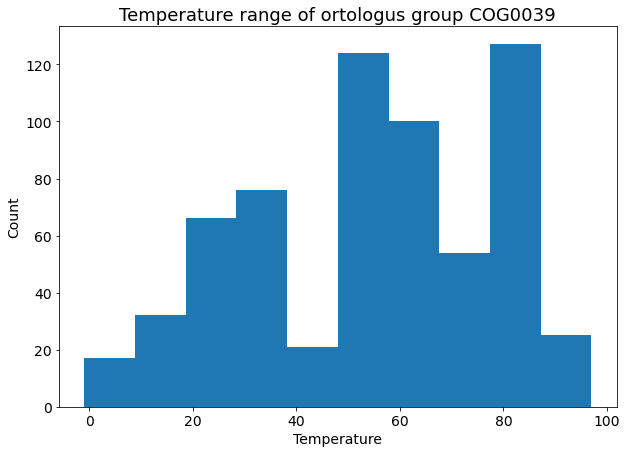

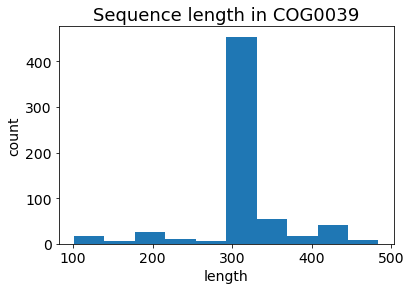

In [12]:
import matplotlib.pyplot as plt

print(len(dict_mdh["id"]))
plt.figure(figsize=[10,7])
plt.hist(dict_mdh["ogt"])
plt.title("Temperature range of ortologus group {}".format("COG0039"))
plt.xlabel("Temperature")
plt.ylabel("Count")
plt.savefig("{}_temperature_distribution.png".format("COG0039"))

plt.figure()
length = [len(str(seq)) for seq in dict_mdh['seq']]
plt.hist(length)
plt.title("Sequence length in {}".format("COG0039"))
plt.xlabel("length")
plt.ylabel("count")

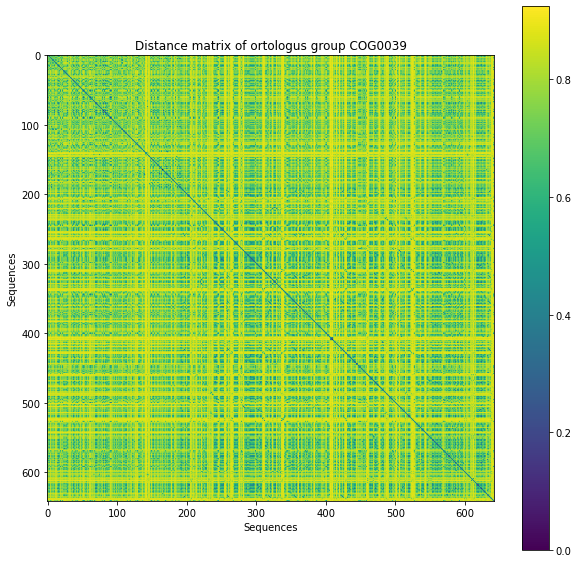

In [2]:
## Load Dist map
import numpy as np
file_dist = "../../data/Combined_data/COG0039.dist"
file_fasta= "../../data/Combined_data/COG0039.fasta"

dict_fasta = {}
for rec in SeqIO.parse(file_fasta, 'fasta'):
    dict_fasta[rec.id] = float(rec.description.split()[-1])

with open(file_dist, 'r') as file_reader:
    for i, line in enumerate(file_reader.readlines()):
        if i == 0:

            n_entries = int(line[:-1])
            dict_dist = {}
            mat_dist  = np.zeros((n_entries, n_entries))
        else:
            elements = line[:-1].split()
            mat_dist[i-1, :] = [float(element) for element in elements[1:]]
            dict_dist[elements[0]] = (np.array([float(element) for element in elements[1:]]), dict_fasta[elements[0]])
plt.figure(figsize=[10,10])
plt.imshow(mat_dist)
plt.colorbar()
plt.title("Distance matrix of ortologus group {}".format("COG0039"))
plt.xlabel("Sequences")
plt.ylabel("Sequences")
plt.savefig("COG0039_distmat.png")

In [18]:
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt

df_dist = pd.read_csv(file_dist, sep = " ", skiprows=1)
df_dist.head()

I8R1T2  Unnamed: 1  Unnamed: 2  Unnamed: 3  Unnamed: 4  0.000000  \
0  A0A117PDE5    0.842444    0.000000    0.829193    0.856269  0.838906   
1  A0A1E3VJA6    0.707395    0.829193    0.000000    0.552795  0.785714   
2  A0A1U7IRU4    0.720257    0.856269    0.552795    0.000000  0.785933   
3  A0A127Z574    0.807074    0.838906    0.785714    0.785933  0.000000   
4  A0A2E6BIV3    0.874598    0.361963    0.826087    0.819018  0.831288   

   0.842444  0.707395  0.720257  0.807074  ...  0.703583.6  0.579805.1  \
0  0.361963  0.844156  0.838906  0.865574  ...    0.827586    0.878173   
1  0.826087  0.652597  0.788820  0.468852  ...    0.542320    0.878173   
2  0.819018  0.594156  0.792049  0.573770  ...    0.498433    0.868020   
3  0.831288  0.769481  0.429003  0.796721  ...    0.786834    0.878173   
4  0.000000  0.811688  0.837423  0.855738  ...    0.815047    0.847716   

   0.564516.1  0.813505.2  0.684887.11  0.862944  0.847368  0.874598.13  \
0    0.863158    0.893617     0.896341  0.408537       NaN          NaN   
1    0.873684    0.888199     0.878882  0.832298       NaN          NaN   
2    0.884211    0.877676     0.880734  0.819572       NaN          NaN   
3    0.868421    0.882175     0.881098  0.832317       NaN          NaN   
4    0.868421    0.883436     0.880368  0.331288       NaN          NaN   

   0.884244.6  0.839228.2  
0         NaN         NaN  
1         NaN         NaN  
2         NaN         NaN  
3         NaN         NaN  
4         NaN         NaN  

[5 rows x 647 columns]

In [5]:
import numba
@numba.njit()
def hue(r, g, b):
    cmax = max(r, g, b)
    cmin = min(r, g, b)
    delta = cmax - cmin
    if cmax == r:
        return ((g - b) / delta) % 6
    elif cmax == g:
        return ((b - r) / delta) + 2
    else:
        return ((r - g) / delta) + 4

@numba.njit()
def lightness(r, g, b):
    cmax = max(r, g, b)
    cmin = min(r, g, b)
    return (cmax + cmin) / 2.0

@numba.njit()
def saturation(r, g, b):
    cmax = max(r, g, b)
    cmin = min(r, g, b)
    chroma = cmax - cmin
    light = lightness(r, g, b)
    if light == 1:
        return 0
    else:
        return chroma / (1 - abs(2*light - 1))

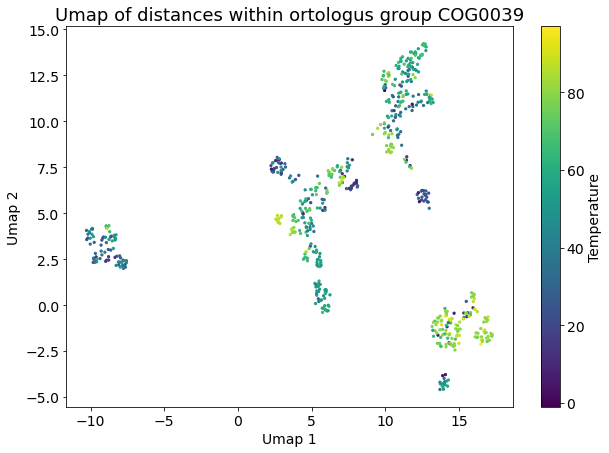

In [27]:
import umap
ogt = [t[-1][-1] for t in dict_dist.items()]
reducer = umap.UMAP(n_neighbors=50, min_dist = 0.5, metric = 'manhattan')
reducer.fit(mat_dist)
X_umap = reducer.transform(mat_dist)
plt.figure(figsize=[10,7])
scatter = plt.scatter(X_umap[:, 0], X_umap[:, 1], c=ogt, s = 5)
plt.colorbar(label = "Temperature")
plt.title('Umap of distances within ortologus group {}'.format("COG0039"))
#handles, labels = scatter.legend_elements(prop="colors", alpha=0.6)
# legend2 = plt.legend(handles, ['Thermophiles', 'Mesophiles'], loc="upper right", title="Distributions")
plt.xlabel('Umap 1')
plt.ylabel('Umap 2')
plt.savefig("{}_similarity_umap.png".format("COG0039"))

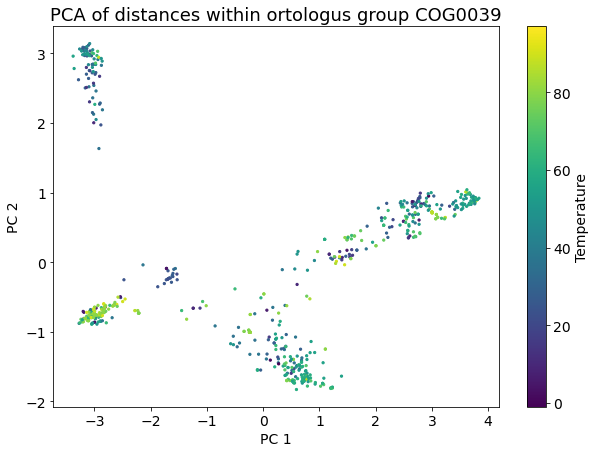

In [6]:
from sklearn.decomposition import PCA

ogt = [t[-1][-1] for t in dict_dist.items()]
pca = PCA(n_components=2)
pca.fit(mat_dist)
X_pca = pca.transform(mat_dist)
plt.figure(figsize=[10,7])
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=ogt, s = 5)
plt.colorbar(label="Temperature")
plt.title('PCA of distances within ortologus group {}'.format("COG0039"))
#handles, labels = scatter.legend_elements(prop="colors", alpha=0.6)
# legend2 = plt.legend(handles, ['Thermophiles', 'Mesophiles'], loc="upper right", title="Distributions")
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.savefig("{}_similarity_pca.png".format("COG0039"))

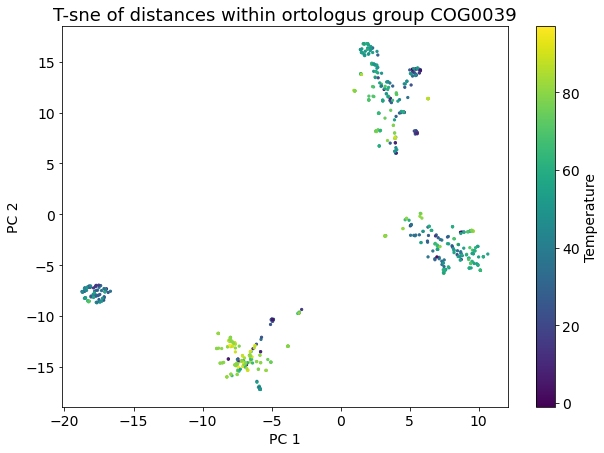

In [7]:
from sklearn.manifold import TSNE

ogt = [t[-1][-1] for t in dict_dist.items()]
tsne = TSNE(n_components=2 , perplexity = 100, n_jobs = 10)
X_tsne = tsne.fit_transform(mat_dist)
#X_tsne = tsne.transform(mat_dist)
plt.figure(figsize=[10,7])
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=ogt, s = 5)
plt.colorbar(label="Temperature")
plt.title('T-sne of distances within ortologus group {}'.format("COG0039"))
#handles, labels = scatter.legend_elements(prop="colors", alpha=0.6)
# legend2 = plt.legend(handles, ['Thermophiles', 'Mesophiles'], loc="upper right", title="Distributions")
plt.xlabel('PC 1')
plt.ylabel('PC 2')

plt.savefig("{}_similarity_tsne.png".format("COG0039"))


In [21]:

from babyplots import Babyplot


bp = Babyplot(x_scale=0.10, y_scale=0.10, z_scale=0.10)

bp.add_plot(X_tsne.tolist(),  "shapeCloud", "values", ogt, {"shape": "sphere",
                                                                 "colorScale": "Set2",
                                                                 "showAxes": [True, True, True],
                                                                 "axisLabels": ["PC 1", "PC 2", "PC 3"]})

bp

<IPython.core.display.Javascript object>

In [13]:
l = X_tsne.tolist()
print(l)
print(type(l[0]))
print(type(ogt))


[[16.892000198364258, -5.372128963470459, 9.377740859985352], [-5.597393035888672, 14.190404891967773, 3.608304500579834], [-11.746036529541016, -1.7355502843856812, 7.515389442443848], [-8.43068790435791, -6.010801792144775, 2.3724257946014404], [8.045208930969238, 0.6340978741645813, -5.8912272453308105], [0.04708472266793251, 13.520110130310059, 7.286736965179443], [-3.816751718521118, -8.160441398620605, 9.050431251525879], [8.98094654083252, -0.2448461353778839, -6.01063871383667], [-8.593949317932129, -2.97698712348938, 5.924792289733887], [8.741663932800293, -0.5270713567733765, -7.381213188171387], [-13.122862815856934, -1.214409589767456, 9.946939468383789], [-3.073761224746704, 14.308296203613281, 7.164154052734375], [9.510494232177734, -0.17206315696239471, -6.81344747543335], [8.103913307189941, 1.5433045625686646, -6.287759304046631], [-3.081319570541382, 14.934316635131836, 8.117100715637207], [-9.28116512298584, -6.68537712097168, -9.305509567260742], [-13.11069869995117

In [9]:
import numpy as np
from sklearn import decomposition
from sklearn import datasets
from babyplots import Babyplot
np.random.seed(5)

# load the data set
iris = datasets.load_iris()
X = iris.data
y = iris.target

# create the babyplots visualization
bp = Babyplot()
bp.add_plot(X.tolist(), "shapeCloud", "categories", y.tolist(), {"shape": "sphere",
                                                                 "colorScale": "Set2",
                                                                 "showAxes": [True, True, True],
                                                                 "axisLabels": ["PC 1", "PC 2", "PC 3"]})
# show the visualization
bp

<IPython.core.display.Javascript object>

In [12]:
X.tolist()

[[5.1, 3.5, 1.4, 0.2],
 [4.9, 3.0, 1.4, 0.2],
 [4.7, 3.2, 1.3, 0.2],
 [4.6, 3.1, 1.5, 0.2],
 [5.0, 3.6, 1.4, 0.2],
 [5.4, 3.9, 1.7, 0.4],
 [4.6, 3.4, 1.4, 0.3],
 [5.0, 3.4, 1.5, 0.2],
 [4.4, 2.9, 1.4, 0.2],
 [4.9, 3.1, 1.5, 0.1],
 [5.4, 3.7, 1.5, 0.2],
 [4.8, 3.4, 1.6, 0.2],
 [4.8, 3.0, 1.4, 0.1],
 [4.3, 3.0, 1.1, 0.1],
 [5.8, 4.0, 1.2, 0.2],
 [5.7, 4.4, 1.5, 0.4],
 [5.4, 3.9, 1.3, 0.4],
 [5.1, 3.5, 1.4, 0.3],
 [5.7, 3.8, 1.7, 0.3],
 [5.1, 3.8, 1.5, 0.3],
 [5.4, 3.4, 1.7, 0.2],
 [5.1, 3.7, 1.5, 0.4],
 [4.6, 3.6, 1.0, 0.2],
 [5.1, 3.3, 1.7, 0.5],
 [4.8, 3.4, 1.9, 0.2],
 [5.0, 3.0, 1.6, 0.2],
 [5.0, 3.4, 1.6, 0.4],
 [5.2, 3.5, 1.5, 0.2],
 [5.2, 3.4, 1.4, 0.2],
 [4.7, 3.2, 1.6, 0.2],
 [4.8, 3.1, 1.6, 0.2],
 [5.4, 3.4, 1.5, 0.4],
 [5.2, 4.1, 1.5, 0.1],
 [5.5, 4.2, 1.4, 0.2],
 [4.9, 3.1, 1.5, 0.2],
 [5.0, 3.2, 1.2, 0.2],
 [5.5, 3.5, 1.3, 0.2],
 [4.9, 3.6, 1.4, 0.1],
 [4.4, 3.0, 1.3, 0.2],
 [5.1, 3.4, 1.5, 0.2],
 [5.0, 3.5, 1.3, 0.3],
 [4.5, 2.3, 1.3, 0.3],
 [4.4, 3.2, 1.3, 0.2],
 [5.0, 3.5,

In [17]:
lis = [1,2,3,4]
print(lis[1:] if len(lis) > 3 else lis)

[2, 3, 4]


In [33]:
from Bio import SeqIO
file = '../../data/Combined_data/all_OGT_IMG.fasta'
fasta_dict = {}
for i, rec in enumerate(SeqIO.parse(file, 'fasta')):
    fasta_dict[str(rec.id)] = (rec.seq, rec.description.split()[-1])

In [34]:
print(len(fasta_dict.keys()))

3220521


In [36]:
import pandas as pd

df = pd.read_csv('../../data/Combined_data/Annotation/OGT_IMG.emapper.annotations', sep='\t', dtype={'#query': str})
df



Unnamed: 0      #query                 seed_ortholog         evalue  \
0                 0  2642843925               370438.PTH_1466   3.870000e-55   
1                 1  2642843958                 2903.EOD41145  1.266000e-157   
2                 2  2642843990       592015.HMPREF1705_00920   3.532000e-06   
3                 3  2642844057               2325.TKV_c09020   6.753000e-07   
4                 4  2642844089              326427.Cagg_0929   9.712000e-32   
...             ...         ...                           ...            ...   
1508688       60730  A0A1S8SEX3              290402.Cbei_0224  8.432000e-169   
1508689       60731  A0A245ZP43  629773.AORY01000001_gene2145   6.415000e-65   
1508690       60732      F0RSM3          158189.SpiBuddy_2320  1.580000e-112   
1508691       60733  A0A0R2PTT0           314287.GB2207_08761  1.704000e-252   
1508692       60734  A0A0R0DXF3               522373.Smlt1718   2.968000e-91   

         score                                         eggNOG_OGs  \
0        201.0  COG0463@1|root,COG0463@2|Bacteria,1UI8D@1239|F...   
1        506.0              COG0156@1|root,KOG1359@2759|Eukaryota   
2         55.0  COG4496@1|root,COG4496@2|Bacteria,3TB9B@508458...   
3         60.0  COG0791@1|root,COG3103@1|root,COG0791@2|Bacter...   
4        135.0  2F07E@1|root,33TAW@2|Bacteria,2GBUX@200795|Chl...   
...        ...                                                ...   
1508688  531.0  COG3959@1|root,COG3959@2|Bacteria,1TT51@1239|F...   
1508689  229.0  COG1024@1|root,COG1024@2|Bacteria,1MXBB@1224|P...   
1508690  364.0  COG0740@1|root,COG0740@2|Bacteria,2J78H@203691...   
1508691  783.0  COG0055@1|root,COG0055@2|Bacteria,1MUFU@1224|P...   
1508692  301.0  COG0245@1|root,COG0245@2|Bacteria,1MVHA@1224|P...   

                    max_annot_lvl COG_category  \
0               186801|Clostridia            H   
1                  2759|Eukaryota            H   
2            508458|Synergistetes            S   
3               186801|Clostridia           MT   
4              32061|Chloroflexia            -   
...                           ...          ...   
1508688         186801|Clostridia            G   
1508689   204457|Sphingomonadales            I   
1508690       203691|Spirochaetes           OU   
1508691  1236|Gammaproteobacteria            C   
1508692    135614|Xanthomonadales            I   

                                               Description Preferred_name  \
0                        Glycosyltransferase like family 2              -   
1                     glycine C-acetyltransferase activity           GCAT   
2                                       protein, YerC YecD              -   
3                               SH3, type 3 domain protein              -   
4                                                        -              -   
...                                                    ...            ...   
1508688                                      Transketolase              -   
1508689  Belongs to the enoyl-CoA hydratase isomerase f...              -   
1508690  Cleaves peptides in various proteins in a proc...         clpP-2   
1508691  Produces ATP from ADP in the presence of a pro...           atpD   
1508692  Involved in the biosynthesis of isopentenyl di...           ispF   

         ...                        KEGG_ko  \
0        ...                              -   
1        ...  ko:K00639,ko:K00652,ko:K01176   
2        ...                              -   
3        ...                      ko:K01447   
4        ...                              -   
...      ...                            ...   
1508688  ...                      ko:K00615   
1508689  ...                              -   
1508690  ...                      ko:K01358   
1508691  ...                      ko:K02112   
1508692  ...                      ko:K01770   

                                              KEGG_Pathway  \
0                                                        -   
1   

In [37]:
df_new = df[df["#query"].isin(list(fasta_dict.keys()))]

In [38]:
df_new

Unnamed: 0      #query                 seed_ortholog         evalue  \
0                 0  2642843925               370438.PTH_1466   3.870000e-55   
1                 1  2642843958                 2903.EOD41145  1.266000e-157   
2                 2  2642843990       592015.HMPREF1705_00920   3.532000e-06   
3                 3  2642844057               2325.TKV_c09020   6.753000e-07   
4                 4  2642844089              326427.Cagg_0929   9.712000e-32   
...             ...         ...                           ...            ...   
1508688       60730  A0A1S8SEX3              290402.Cbei_0224  8.432000e-169   
1508689       60731  A0A245ZP43  629773.AORY01000001_gene2145   6.415000e-65   
1508690       60732      F0RSM3          158189.SpiBuddy_2320  1.580000e-112   
1508691       60733  A0A0R2PTT0           314287.GB2207_08761  1.704000e-252   
1508692       60734  A0A0R0DXF3               522373.Smlt1718   2.968000e-91   

         score                                         eggNOG_OGs  \
0        201.0  COG0463@1|root,COG0463@2|Bacteria,1UI8D@1239|F...   
1        506.0              COG0156@1|root,KOG1359@2759|Eukaryota   
2         55.0  COG4496@1|root,COG4496@2|Bacteria,3TB9B@508458...   
3         60.0  COG0791@1|root,COG3103@1|root,COG0791@2|Bacter...   
4        135.0  2F07E@1|root,33TAW@2|Bacteria,2GBUX@200795|Chl...   
...        ...                                                ...   
1508688  531.0  COG3959@1|root,COG3959@2|Bacteria,1TT51@1239|F...   
1508689  229.0  COG1024@1|root,COG1024@2|Bacteria,1MXBB@1224|P...   
1508690  364.0  COG0740@1|root,COG0740@2|Bacteria,2J78H@203691...   
1508691  783.0  COG0055@1|root,COG0055@2|Bacteria,1MUFU@1224|P...   
1508692  301.0  COG0245@1|root,COG0245@2|Bacteria,1MVHA@1224|P...   

                    max_annot_lvl COG_category  \
0               186801|Clostridia            H   
1                  2759|Eukaryota            H   
2            508458|Synergistetes            S   
3               186801|Clostridia           MT   
4              32061|Chloroflexia            -   
...                           ...          ...   
1508688         186801|Clostridia            G   
1508689   204457|Sphingomonadales            I   
1508690       203691|Spirochaetes           OU   
1508691  1236|Gammaproteobacteria            C   
1508692    135614|Xanthomonadales            I   

                                               Description Preferred_name  \
0                        Glycosyltransferase like family 2              -   
1                     glycine C-acetyltransferase activity           GCAT   
2                                       protein, YerC YecD              -   
3                               SH3, type 3 domain protein              -   
4                                                        -              -   
...                                                    ...            ...   
1508688                                      Transketolase              -   
1508689  Belongs to the enoyl-CoA hydratase isomerase f...              -   
1508690  Cleaves peptides in various proteins in a proc...         clpP-2   
1508691  Produces ATP from ADP in the presence of a pro...           atpD   
1508692  Involved in the biosynthesis of isopentenyl di...           ispF   

         ...                        KEGG_ko  \
0        ...                              -   
1        ...  ko:K00639,ko:K00652,ko:K01176   
2        ...                              -   
3        ...                      ko:K01447   
4        ...                              -   
...      ...                            ...   
1508688  ...                      ko:K00615   
1508689  ...                              -   
1508690  ...                      ko:K01358   
1508691  ...                      ko:K02112   
1508692  ...                      ko:K01770   

                                              KEGG_Pathway  \
0                                                        -   
1   

In [46]:
import os

os.path.isdir("/tmp/img_tmp")

False

In [ ]:
from Bio import SeqIO

file_thermo_pub="../../data/img_data/img_thermophile_published_temp.fasta"
file_thermo_unpub="../../data/img_data/img_thermophile_temp.fasta"
file_psychro_pub="../../data/img_data/img_psychrophile_published_temp.fasta"
file_psychro_unpub="../../data/img_data/img_psychrophile_temp.fasta"

for i in SeqIO.parse()

In [48]:
import pandas as pd

file = '../../data/Combined_data/all_OGT_IMG_cd.fasta.clstr'

df = pd.read_csv(file, sep="\t")

In [49]:
df.head()

>Cluster 0
0               512aa, >W5YBR0... *
>Cluster 1                      NaN
0           512aa, >A0A073ITS8... *
>Cluster 2                      NaN
0               512aa, >V4XTR3... *

In [52]:
!head -n 5 ../../data/Combined_data/all_OGT_IMG_cd.fasta.clstr

>Cluster 0
0	512aa, >W5YBR0... *
>Cluster 1
0	512aa, >A0A073ITS8... *
>Cluster 2
